In [165]:
import numpy as np
from scipy.stats import beta
import matplotlib.pylab as plt

In [166]:
plt.rcParams['figure.figsize'] = [10, 8]

In [167]:
def beta_mean(alpha, beta):
    return alpha / (alpha + beta)

def beta_mode(alpha, beta):
    if alpha+beta-2 == 0:
        return np.nan
    return (alpha-1)/ (alpha+beta-2)

def beta_var(alpha, beta):
    return (alpha*beta)/(((alpha+beta)**2)*(alpha+beta+1))

In [168]:
def print_beta(alpha, beta):
    print("Beta(%d, %d)" %(alpha, beta))
    print("Mean: %0.3f Mode: %0.3f Variance: %0.3f" 
          %(beta_mean(alpha, beta), beta_mode(alpha, beta), beta_var(alpha, beta)))

Beta(20, 20)
Mean: 0.500 Mode: 0.500 Variance: 0.006


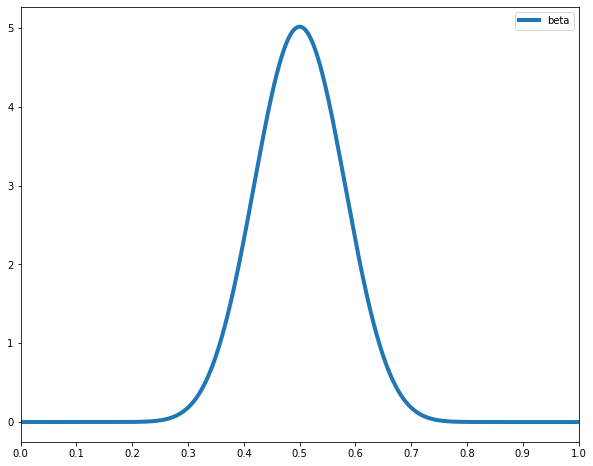

In [177]:
beta_params = np.asarray([20, 20])

print_beta(*beta_params)

lw = 4

x=np.linspace(0,1, num=10000)

fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlim([0, 1])
ax.set_xticks(np.arange(0, 1.01, 0.1))

ax.plot(x,beta.pdf(x, *beta_params), lw=lw, label='beta')

ax.legend()

MLE: 0.400

prior
Beta(10, 2)
Mean: 0.833 Mode: 0.900 Variance: 0.011

Data
[4 6]

Posterior
Beta(14, 8)
Mean: 0.636 Mode: 0.650 Variance: 0.010


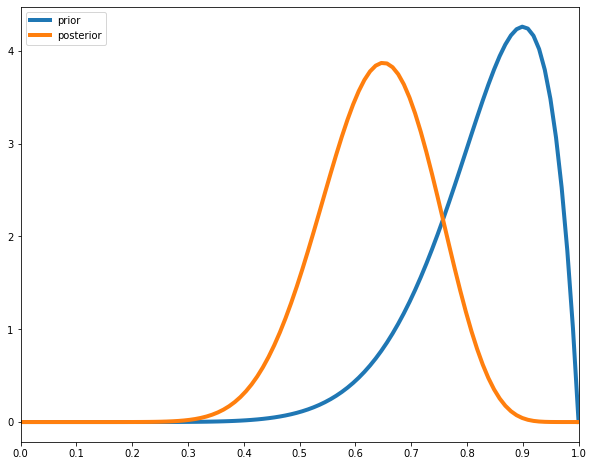

In [189]:
prior = np.asarray([10, 2])
D = np.asarray([4, 6])
posterior = prior + D

print("MLE: %0.3f" %(D[0]/np.sum(D)))
print()

print("prior")
print_beta(*prior)
print()

print("Data")
print(D)
print()

print("Posterior")
print_beta(*posterior)

lw = 4

x=np.linspace(0,1, num=100)

fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlim([0, 1])
ax.set_xticks(np.arange(0, 1.01, 0.1))

ax.plot(x,beta.pdf(x, *prior), lw=lw, label='prior')
#ax.plot(x,beta.pdf(x, *D), lw=lw, label='data')
ax.plot(x,beta.pdf(x, *posterior), lw=lw, label='posterior')

ax.legend()

MLE: 0.400

prior
Beta(10, 2)
Mean: 0.833 Mode: 0.900 Variance: 0.011

Posteriors
Beta(14, 8)
Mean: 0.636 Mode: 0.650 Variance: 0.010

Beta(18, 14)
Mean: 0.562 Mode: 0.567 Variance: 0.007

Beta(22, 20)
Mean: 0.524 Mode: 0.525 Variance: 0.006

Beta(26, 26)
Mean: 0.500 Mode: 0.500 Variance: 0.005

Beta(30, 32)
Mean: 0.484 Mode: 0.483 Variance: 0.004



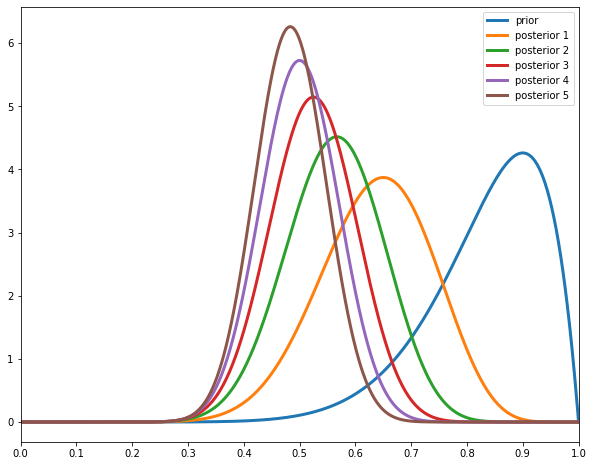

In [193]:
prior = np.asarray([10, 2])
D = np.asarray([4, 6])

lw = 3

x=np.linspace(0,1, num=1000)

fig = plt.figure()
ax = fig.add_subplot()

ax.set_xlim([0, 1])
ax.set_xticks(np.arange(0, 1.01, 0.1))

ax.plot(x,beta.pdf(x, *prior), lw=lw, label='prior')

print("MLE: %0.3f" %(D[0]/np.sum(D)))
print()

print("prior")
print_beta(*prior)
print()

print("Posteriors")

for i in range(1, 6):
    D_n = i*D
    ax.plot(x,beta.pdf(x, *(prior+D_n)), lw=lw, label='posterior '+str(i))
    print_beta(*(prior+D_n))
    print()

#ax.plot(x,beta.pdf(x, *posterior_s), lw=lw, label='posterior_s')
#ax.plot(x,beta.pdf(x, *posterior_l), lw=lw, label='posterior_l')

ax.legend()